In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

plt.rcParams['font.family'] = 'Arial'

import warnings
warnings.filterwarnings("ignore")

In [20]:
# Load volcano data
volcano_df = pd.read_csv('./data/volcano.csv')

# Load annotation data
id_df = pd.read_excel('./data/Key_metabolites.xlsx', sheet_name='id')

In [21]:
volcano_df = volcano_df.rename(columns={
    'features': 'identifier',
    'p.ajusted': 'adjusted_p',
    '-log10(p)': '-log10(p)'
})
volcano_df['identifier'] = volcano_df['identifier'].str.strip()
id_df['identifier'] = id_df['Features (RT_mz)'].astype(str).str.strip()

merged_df = pd.merge(
    volcano_df,
    id_df[['identifier', 'Putative source']],
    on='identifier',
    how='left'
)


In [23]:
source_color_map = {
    'Metabolic intermediate': 'red',
    'Native phytochemical': 'blue',
    'Hydrolysis product': 'green',
    np.nan: 'lightgray'
}

source_color_map = {
    'Metabolic intermediate': '#f8766d',
    'Native phytochemical': '#64b5f6',
    'Hydrolysis product': '#7cae00',
    np.nan: 'lightgray'
}

merged_df['plot_color'] = merged_df['Putative source'].map(source_color_map).fillna('lightgray')
merged_df['marker_size'] = merged_df['Putative source'].apply(lambda x: 30 if pd.notna(x) else 10)

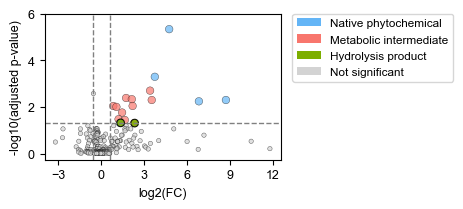

In [ ]:
non_hydrolysis_df = merged_df[merged_df['Putative source'] != 'Hydrolysis product']
hydrolysis_df = merged_df[merged_df['Putative source'] == 'Hydrolysis product'].copy()

# "Minor adjustments were made to the x and y positions to avoid overlap."
# "The x and y positions were slightly adjusted to prevent overlap, with minimal impact on the values."

if len(hydrolysis_df) >= 2:
    hydrolysis_df['log2(FC)'].iloc[0] += 0.1
    hydrolysis_df['log2(FC)'].iloc[1] -= 0.1
    hydrolysis_df['-log10(p)'].iloc[0] += 0.05
    hydrolysis_df['-log10(p)'].iloc[1] -= 0.05

# 6. Volcano plot
plt.figure(figsize=(4.8, 2.2))

plt.scatter(
    non_hydrolysis_df['log2(FC)'],
    non_hydrolysis_df['-log10(p)'],
    c=non_hydrolysis_df['plot_color'],
    s=non_hydrolysis_df['marker_size'],
    alpha=0.7,
    edgecolors='black',
    linewidths=0.3,
    marker='o'
)

plt.scatter(
    hydrolysis_df['log2(FC)'],
    hydrolysis_df['-log10(p)'],
    c=hydrolysis_df['plot_color'],
    s=hydrolysis_df['marker_size'],
    alpha=0.9,
    edgecolors='black',
    linewidths=0.8,
    marker='o'
)

plt.axvline(np.log2(1.5), color='gray', linestyle='--', linewidth=1)
plt.axvline(-np.log2(1.5), color='gray', linestyle='--', linewidth=1)
plt.axhline(-np.log10(0.05), color='gray', linestyle='--', linewidth=1)

legend_elements = [
    Patch(facecolor='#64b5f6', label='Native phytochemical'),
    Patch(facecolor='#f8766d', label='Metabolic intermediate'),
    Patch(facecolor='#7cae00', label='Hydrolysis product'),
    Patch(facecolor='lightgray', label='Not significant')
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=8.5)

plt.xlabel('log2(FC)', fontsize=9)
plt.ylabel('-log10(adjusted p-value)', fontsize=9)
plt.xticks([-3, 0, 3, 6, 9, 12], fontsize=9)
plt.yticks([0, 2, 4, 6], fontsize=9)

plt.yticks(fontsize=9)

# plt.title('Volcano Plot Colored by Putative Source')
plt.tight_layout()
# plt.savefig('volcano.png', dpi=600)
plt.show()